In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt




In [2]:
# Step 1: Generate synthetic data
np.random.seed(0)  # for reproducibility
lambda_true = 3  # true rate parameter
n_days = 20
observed_data = np.random.poisson(lambda_true, n_days)



In [3]:
# Step 2: Define Gamma prior parameters
alpha_prior = 2
beta_prior = 2



In [4]:
# Step 3: Update posterior parameters based on observed data
alpha_posterior = alpha_prior + np.sum(observed_data)
beta_posterior = beta_prior + n_days



In [5]:
# Function to calculate posterior parameters
def update_posterior(data, alpha, beta):
    return alpha + np.sum(data), beta + len(data)



In [6]:
# Display results
print("Observed data:", observed_data)
print("Updated posterior shape parameter (alpha):", alpha_posterior)
print("Updated posterior rate parameter (beta):", beta_posterior)

Observed data: [5 6 2 0 7 3 3 1 6 1 3 3 2 2 2 2 3 3 3 1]
Updated posterior shape parameter (alpha): 60
Updated posterior rate parameter (beta): 22


In [7]:
# Define range for lambda values
lambda_range = np.linspace(0, 10, 500)


In [8]:
# Calculate prior and posterior distributions
prior = stats.gamma.pdf(lambda_range, a=alpha_prior, scale=1/beta_prior)
posterior = stats.gamma.pdf(lambda_range, a=alpha_posterior, scale=1/beta_posterior)



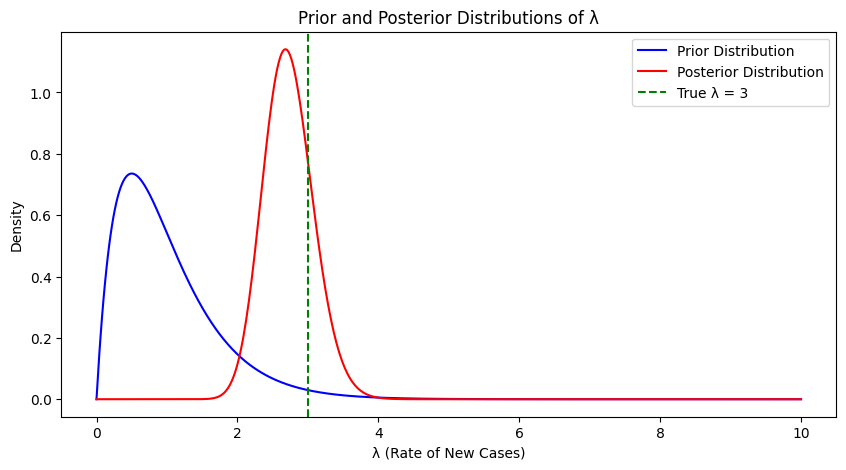

In [9]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(lambda_range, prior, label='Prior Distribution', color='blue')
plt.plot(lambda_range, posterior, label='Posterior Distribution', color='red')
plt.axvline(lambda_true, color='green', linestyle='--', label=f'True λ = {lambda_true}')
plt.xlabel('λ (Rate of New Cases)')
plt.ylabel('Density')
plt.title('Prior and Posterior Distributions of λ')
plt.legend()
plt.show()